## Business Case :

## Features Used for Prediction:
The prediction of the forest cover type is based on a variety of features, which can be broadly categorized into the following:

## Geographical Features:

* Elevation: The height above sea level.
* Aspect: The compass direction that the slope faces (in degrees).
* Slope: The steepness or incline of the terrain (in degrees).
* Horizontal_Distance_To_Hydrology: The horizontal distance to the nearest surface water features (e.g., rivers, lakes).
* Vertical_Distance_To_Hydrology: The vertical distance to the nearest surface water features.
* Horizontal_Distance_To_Roadways: The horizontal distance to the nearest roadway.
* Hillshade_9am, Hillshade_Noon, Hillshade_3pm: Measures of shade (or the amount of sunlight) at different times of the day.

## Hillshade_9am 

* it is a feature in the Forest Cover dataset that represents the amount of sunlight or shade at a given location at 9:00 AM, based on the terrain's aspect, slope, and elevation.

## Hillshade Details:

* Measurement Unit: Hillshade values typically range from 0 to 255.
* 0 represents complete shadow (no direct sunlight).
* 255 represents full illumination (maximum direct sunlight).
* Type of Feature: This is a continuous numerical feature.

## How Hillshade is Calculated:

* Hillshade is calculated based on the angle of the sun at a specific time of day (in this case, 9:00 AM) and how the terrain's shape (e.g., hills, valleys, slopes) interacts with the sunlight.

* Factors like slope (the steepness of the terrain) and aspect (the direction the slope faces) play crucial roles in determining the hillshade value.

* A slope facing directly towards the sun at 9:00 AM will have a higher hillshade value, indicating more sunlight.

* A slope facing away from the sun might be in shadow, resulting in a lower hillshade value.

## Horizontal_Distance_To_Hydrology & Vertical_Distance_To_Hydrology:

* Hydrology is a crucial factor in determining the type of vegetation

* Measurement Unit: hydrology distance is measured in meters.
* Type of Feature: This is a continuous numerical feature.

## Hydrology Positive and Negative Values:

* A positive value indicates that the location is above the water source.
* A negative value indicates that the location is below the water source.  


## Soil Types:

* Soil_Type1 to Soil_Type40: Binary features indicating the presence of different soil types.
## Wilderness Areas:

* Wilderness_Area1 to Wilderness_Area4: Binary features indicating the presence of different wilderness areas.

## Wilderness Areas in the Dataset :

* Wilderness_Area1: Represents the first wilderness area (e.g., "Rawah Wilderness Area").
* Wilderness_Area2: Represents the second wilderness area (e.g., "Neota Wilderness Area").
* Wilderness_Area3: Represents the third wilderness area (e.g., "Comanche Peak Wilderness Area").
* Wilderness_Area4: Represents the fourth wilderness area (e.g., "Cache la Poudre Wilderness Area").

* These wilderness areas are located in the Roosevelt National Forest in northern Colorado, USA.


## Prediction Task:
* The prediction task involves training a machine learning model on the dataset's features to classify the Cover_Type for each observation.
* Classification Algorithms: Common algorithms used for this task include Decision Trees, Random Forests, Gradient Boosting Machines (GBMs), Support Vector Machines (SVMs), and Neural Networks.
* Evaluation: Model performance is typically evaluated using metrics like accuracy, precision, recall, and F1-score, based on the model's ability to correctly predict the forest cover type.

## Target Variable (Cover_Type):

* The dataset's main target variable is Cover_Type, which indicates the type of forest cover. It is a categorical variable with 7 possible classes, each representing a different type of forest cover.

## The Output classes are typically labeled as follows:
* 1.Spruce/Fir
* 2.Lodgepole Pine
* 3.Ponderosa Pine
* 4.Cottonwood/Willow
* 5.Aspen
* 6.Douglas-fir
* 7.Krummholz

# FOREST COVER TYPE :

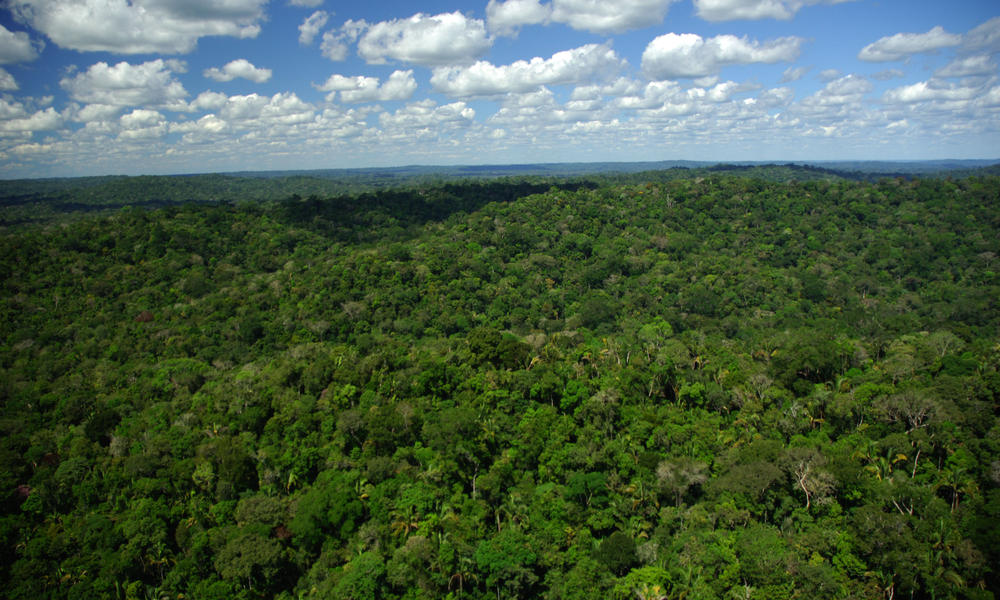

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
dt=pd.read_csv('train.csv')

In [6]:
pd.set_option('display.max_columns',None)
dt.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

In [4]:
pd.set_option('display.max_columns',None)
dt.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
15115                 1                 0           0           0           0   
15116                 1                 0           0           0           0   
15117                 1                 0           0           0           0   
15118                 1                 0           0           0           0   
15119                 1                 0           0           1           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
15115           1           0           0           0           0           0   
15116           1           0           0           0           0           0   
15117           1           0           0           0           0           0   
15118           1           0           0           0           0           0   
15119           0           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            

In [5]:
pd.set_option('display.max_columns',None)
dt.sample(5)


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
5542    5543       2272     328     19                                30   
13332  13333       2495       7     14                               301   
8790    8791       2762      38      5                               379   
14965  14966       2661     244     32                                85   
5598    5599       2473      24      6                               162   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
5542                               10                             1254   
13332                              52                              150   
8790                               67                             1879   
14965                              55                             2737   
5598                               22                              828   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
5542             172             215            181   
13332            201             211            145   
8790             220             228            144   
14965            141             245            229   
5598             217             227            147   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
5542                                  618                 0                 0   
13332                                1814                 0                 0   
8790                                 2215                 0                 0   
14965                                1114                 0                 0   
5598                                 1092                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
5542                  0                 1           0           0           0   
13332                 0                 1           0           0           0   
8790                  1                 0           0           0           0   
14965                 1                 0           0           0           0   
5598                  0                 1           0           0           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
5542            0           0           0           0           0           0   
13332           0           0           1           0           0           0   
8790            0           0           0           0           0           0   
14965           1           0           0           0           0           0   
5598            0           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
5542             0            0            0            0            1   
13332            0            0            0            0            0   
8790             1            0            0            0            0   
14965            0            0            0            0            0   
5598             1            0            0            0            0   

       Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
5542             0            0            0            0            0   
13332            0            0            0            0            0   
8790             0            0            0            0            0   
14965            0            0            0            0            0   
5598             0            0            0            0            0   

       Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
5542             0            0            0            0            0   
13332            0            0            0            0            0   
8790             0            0            0            0            0   
14965            0            0            0            0            0   
5598             0            0            0            

## Basic check the datasets :

In [6]:
dt.shape

(15120, 56)

In [7]:
dt.size

846720

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [9]:
pd.set_option('display.max_columns',None)
dt.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000 

In [10]:
dt.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


## Domain Analysis :
* Non-Null values for each columns. 

In [11]:
dt.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

## EXPOLATORY DATA ANALYSIS (EDA) :

In [13]:
dt.loc[dt.Elevation==dt['Elevation'].max()]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
9727    9728       3849     353      9                               984   
14562  14563       3849     348     17                               891   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
9727                               73                             4592   
14562                              73                             4444   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
9727             204             224            158   
14562            186             209            160   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
9727                                 2642                 0                 0   
14562                                2506                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
9727                  1                 0           0           0           0   
14562                 1                 0           0           0           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
9727            0           0           0           0           0           0   
14562           0           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type40  Cover_Type  
9727             1           7  
14562            1           7

In [14]:
dt.loc[(dt.Elevation==dt['Elevation'].max())&(dt.Cover_Type==dt['Cover_Type'].max())]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
9727    9728       3849     353      9                               984   
14562  14563       3849     348     17                               891   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
9727                               73                             4592   
14562                              73                             4444   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
9727             204             224            158   
14562            186             209            160   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
9727                                 2642                 0                 0   
14562                                2506                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
9727                  1                 0           0           0           0   
14562                 1                 0           0           0           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
9727            0           0           0           0           0           0   
14562           0           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
9727             0            0            0            0            0   
14562            0            0            0            0            0   

       Soil_Type40  Cover_Type  
9727             1           7  
14562            1           7

In [15]:
dt.loc[(dt.Elevation==dt['Elevation'].min())&(dt.Cover_Type<7)]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2234  2235       1863      37     17                               120   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
2234                              18                               90   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
2234            217             202            115   

      Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
2234                                 769                 0                 0   

      Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
2234                 0                 1           0           1           0   

      Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
2234           0           0           0           0           0           0   

      Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
2234            0            0            0            0            0   

      Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
2234            0            0            0            0            0   

      Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
2234            0            0            0            0            0   

      Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
2234            0            0            0            0            0   

      Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
2234            0            0            0            0            0   

      Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
2234            0            0            0            0            0   

      Soil_Type40  Cover_Type  
2234            0           6

In [16]:
dt.loc[dt.Elevation==dt['Elevation'].min()]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2234  2235       1863      37     17                               120   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
2234                              18                               90   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
2234            217             202            115   

      Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
2234                                 769                 0                 0   

      Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
2234                 0                 1           0           1           0   

      Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
2234           0           0           0           0           0           0   

      Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
2234            0            0            0            0            0   

      Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
2234            0            0            0            0            0   

      Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
2234            0            0            0            0            0   

      Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
2234            0            0            0            0            0   

      Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
2234            0            0            0            0            0   

      Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
2234            0            0            0            0            0   

      Soil_Type40  Cover_Type  
2234            0           6

In [17]:
dt.loc[(dt.Vertical_Distance_To_Hydrology==dt['Vertical_Distance_To_Hydrology'].max())&(dt.Cover_Type<7)]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1803  1804       2931     283     26                               778   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
1803                             554                              854   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
1803            138             230            227   

      Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
1803                                2642                 0                 0   

      Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
1803                 1                 0           0           0           0   

      Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
1803           0           0           0           0           0           0   

      Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
1803            0            0            0            0            0   

      Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
1803            0            0            0            0            0   

      Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
1803            0            0            0            0            0   

      Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
1803            0            0            0            0            0   

      Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
1803            0            0            0            1            0   

      Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
1803            0            0            0            0            0   

      Soil_Type40  Cover_Type  
1803            0           2

In [18]:
dt.loc[(dt.Horizontal_Distance_To_Hydrology	==dt['Horizontal_Distance_To_Hydrology'].max())&(dt.Cover_Type<7)]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
7892  7893       3108      65     14                              1343   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
7892                             194                             3001   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
7892            233             210            106   

      Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
7892                                1359                 0                 0   

      Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
7892                 1                 0           0           0           0   

      Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
7892           0           0           0           0           0           0   

      Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
7892            0            0            0            0            0   

      Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
7892            0            0            0            0            0   

      Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
7892            0            0            0            0            0   

      Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
7892            0            0            0            0            0   

      Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
7892            0            0            1            0            0   

      Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
7892            0            0            0            0            0   

      Soil_Type40  Cover_Type  
7892            0           2

In [19]:
dt.loc[(dt.Horizontal_Distance_To_Roadways==dt['Horizontal_Distance_To_Roadways'].max())&(dt.Cover_Type<7)]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
121  122       3070       0     11                                30   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
121                              -6                             6890   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
121            204             220            153   

     Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
121                                2858                 1                 0   

     Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
121                 0                 0           0           0           0   

     Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
121           0           0           0           0           0           0   

     Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
121            0            0            0            0            0   

     Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
121            0            0            0            0            0   

     Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
121            0            0            0            0            0   

     Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
121            0            0            0            0            1   

     Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
121            0            0            0            0            0   

     Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
121            0            0            0            0            0   

     Soil_Type40  Cover_Type  
121            0           2

In [20]:
dt.loc[dt.Aspect==dt['Aspect'].max()]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2343    2344       2062     360     30                               300   
12204  12205       2046     360     29                               124   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
2343                              213                              272   
12204                              97                              150   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
2343             162             171            135   
12204            165             174            136   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
2343                                  845                 0                 0   
12204                                 127                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
2343                  0                 1           0           0           0   
12204                 0                 1           0           0           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
2343            0           1           0           0           0           0   
12204           0           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
2343             0            0            0            0            0   
12204            1            0            0            0            0   

       Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
2343             0            0            0            0            0   
12204            0            0            0            0            0   

       Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
2343             0            0            0            0            0   
12204            0            0            0            0            0   

       Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
2343             0            0            0            0            0   
12204            0            0            0            0            0   

       Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
2343             0            0            0            0            0   
12204            0            0            0            0            0   

       Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
2343             0            0            0            0            0   
12204            0            0            0            0            0   

       Soil_Type40  Cover_Type  
2343             0           6  
12204            0           3

In [21]:
dt.loc[dt.Aspect==dt['Aspect'].min(),'Aspect'].value_counts()

Aspect
0    110
Name: count, dtype: int64

In [22]:
dt.loc[dt.Slope==dt['Slope'].max()]

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2241  2242       2618     301     52                               124   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
2241                              59                             1789   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
2241              0             157            231   

      Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
2241                                1396                 0                 0   

      Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
2241                 1                 0           0           0           0   

      Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
2241           0           0           0           0           0           0   

      Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
2241            0            0            0            1            0   

      Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
2241            0            0            0            0            0   

      Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
2241            0            0            0            0            0   

      Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
2241            0            0            0            0            0   

      Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
2241            0            0            0            0            0   

      Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
2241            0            0            0            0            0   

      Soil_Type40  Cover_Type  
2241            0           6

In [23]:
dt.loc[dt.Slope==dt['Slope'].min(),'Slope'].value_counts()

Slope
0    5
Name: count, dtype: int64

In [24]:
dt.Slope.unique()

array([ 3,  2,  9, 18,  6,  7,  4, 10, 11, 22,  1,  5, 17, 23,  8, 16, 24,
       30, 19, 28, 12, 27, 25, 14, 13, 26, 15, 33, 20, 21, 31, 32, 29, 40,
       34, 36, 39, 35, 48, 47, 46, 49, 45, 44,  0, 37, 41, 38, 52, 42, 43,
       50], dtype=int64)

In [25]:
dt.Vertical_Distance_To_Hydrology.value_counts()

Vertical_Distance_To_Hydrology
 0      1890
 5       217
 3       206
 4       200
 8       198
        ... 
 325       1
 289       1
 274       1
 288       1
-89        1
Name: count, Length: 423, dtype: int64

In [26]:
dt.Horizontal_Distance_To_Hydrology.value_counts()

Horizontal_Distance_To_Hydrology
0       1590
30      1207
150      497
60       490
42       452
        ... 
828        1
972        1
1148       1
930        1
1199       1
Name: count, Length: 400, dtype: int64

In [27]:
dt.Horizontal_Distance_To_Roadways.value_counts()

Horizontal_Distance_To_Roadways
150     88
120     56
390     47
618     45
1110    43
        ..
4692     1
5219     1
2937     1
5498     1
1833     1
Name: count, Length: 3250, dtype: int64

In [28]:
dt.Horizontal_Distance_To_Roadways.value_counts()[0]

3

In [29]:
dt.Soil_Type10.value_counts()

Soil_Type10
0    12978
1     2142
Name: count, dtype: int64

In [30]:
dt.duplicated().value_counts()

False    15120
Name: count, dtype: int64

## Visualize the Graph :

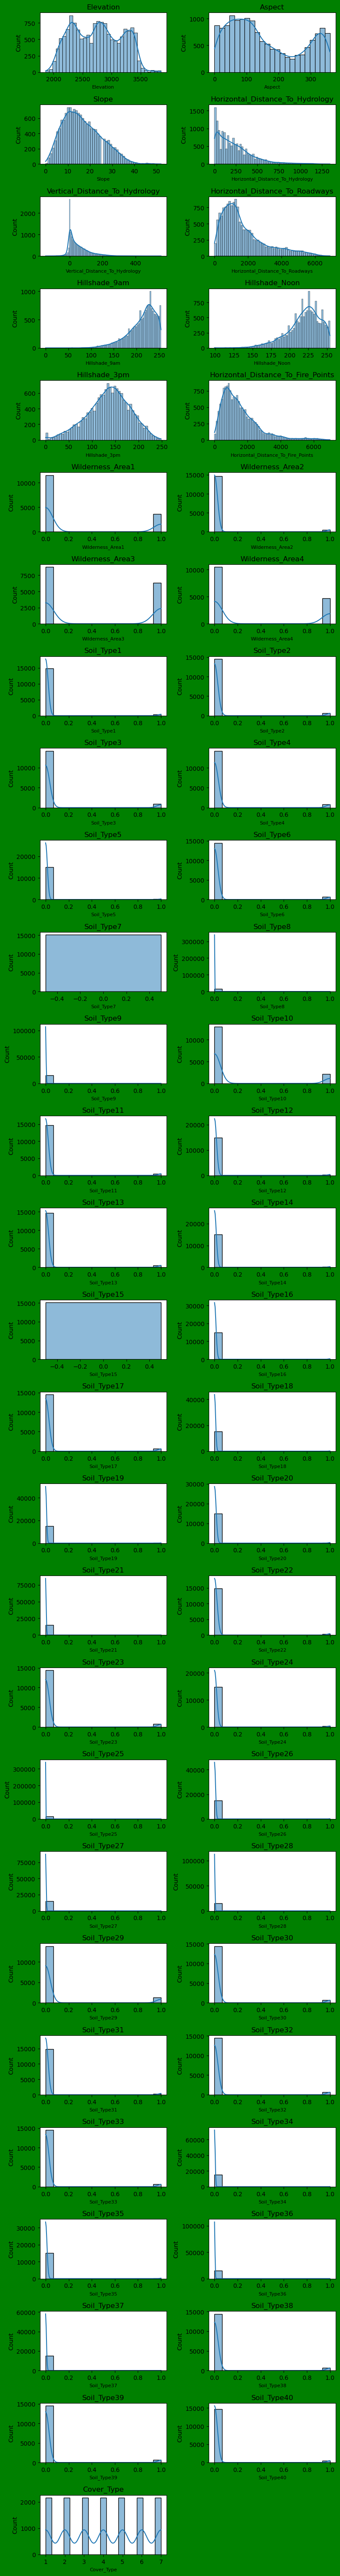

In [150]:
plt.figure(figsize=(8,60),facecolor='green')
plotnumber=1
for i in dt.drop(['Id'],axis=1):
    plt.subplot(28,2,plotnumber)
    sns.histplot(x=i,data=dt,kde=True)
    plt.xlabel(i,fontsize=8)
    plt.title(i)
    plotnumber+=1
plt.tight_layout()

## Domain analysis :
* Soil Type 7 and Soil Type 15 features are Non values are all rows.so we have drop the features.
* Slope,Horizontal_Distance_To_Hydrology and      Horizontal_Distance_To_Roadways,Vertical_Distance_To_Hydrology,Horizontal_distance_Fire_Points
 these features are negative skew.
* Hillshade_9am,Hillshade_Noon features are Positive skew.
* ID features does not mandatory .se we have drop that features.

In [31]:
dt.drop(['Id'],axis=1,inplace=True)

## Visualization :

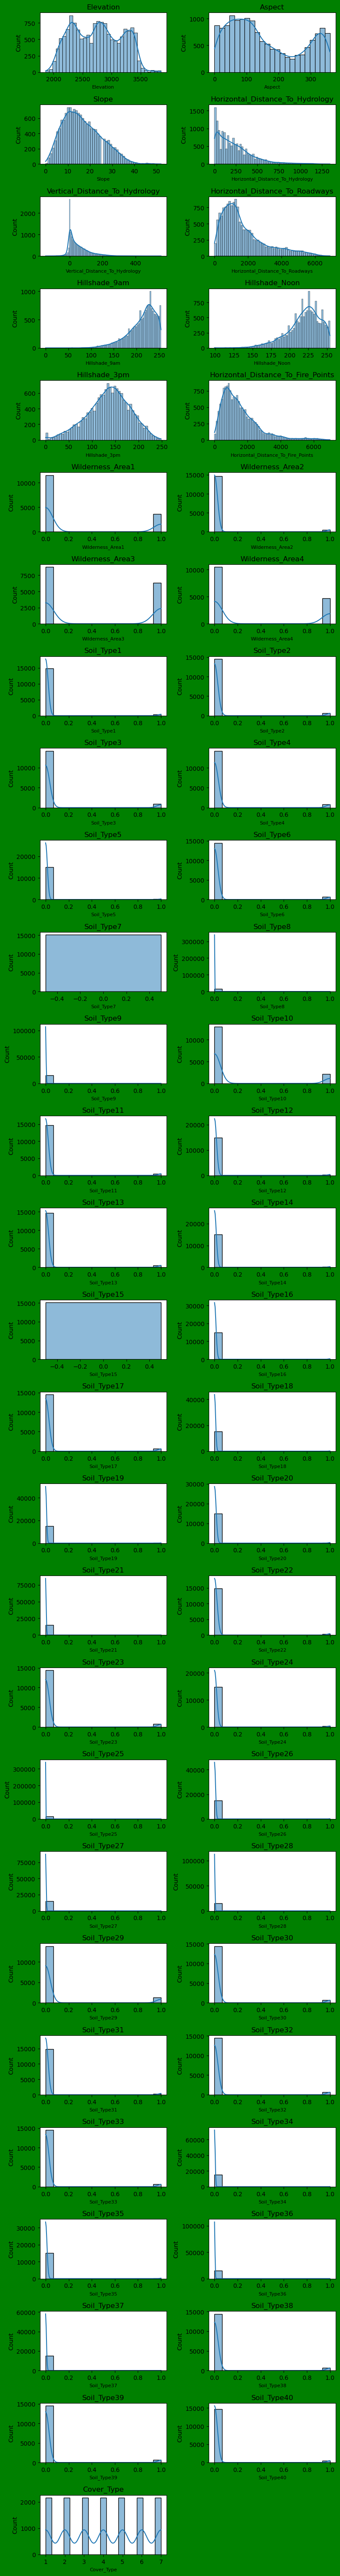

In [33]:
plt.figure(figsize=(8,60),facecolor='green')
plotnumber=1
for i in dt:
    plt.subplot(28,2,plotnumber)
    sns.histplot(x=i,data=dt,kde=True)
    plt.xlabel(i,fontsize=8)
    plt.title(i)
    plotnumber+=1
plt.tight_layout()

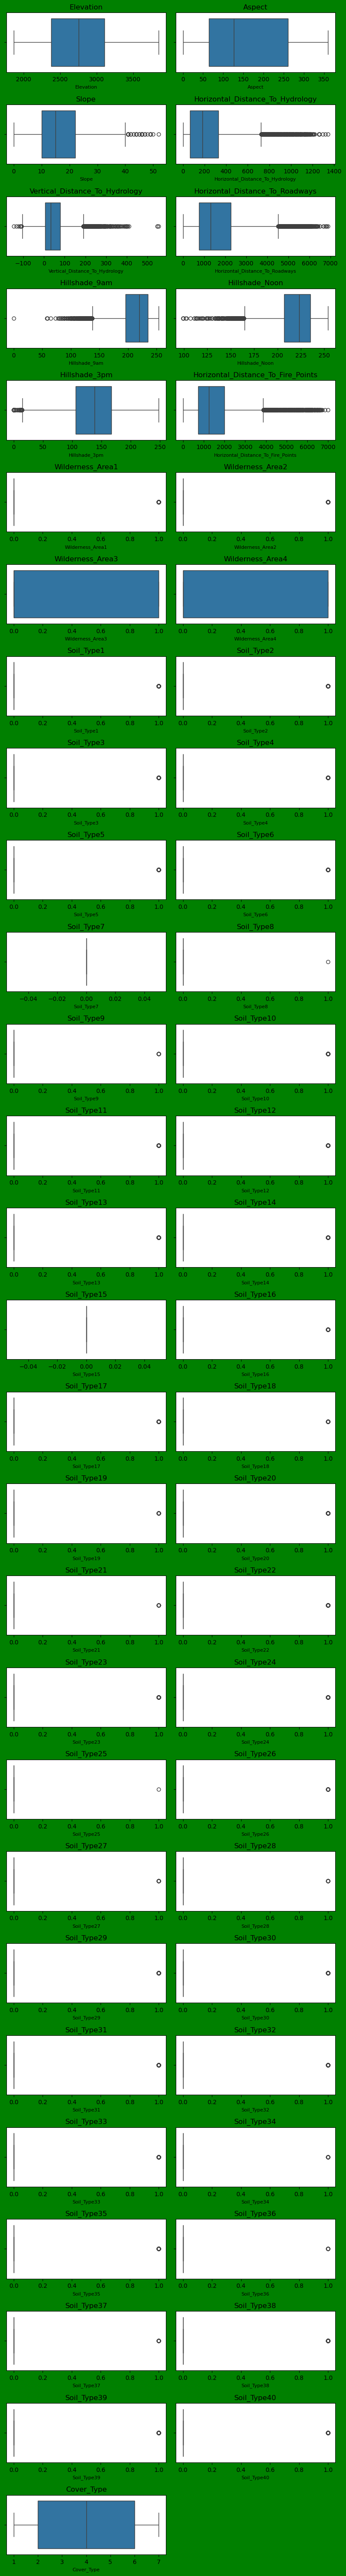

In [34]:
plt.figure(figsize=(8,60),facecolor='green')
plotnumber=1
for i in dt:
    plt.subplot(28,2,plotnumber)
    sns.boxplot(x=i,data=dt)
    plt.xlabel(i,fontsize=8)
    plt.title(i)
    plotnumber+=1
plt.tight_layout()

In [32]:
dt.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Soil_Type7    Soil_Type8    Soil_Type9   Soil_Type10   Soil_Type11  \
count     15120.0  15120.00000

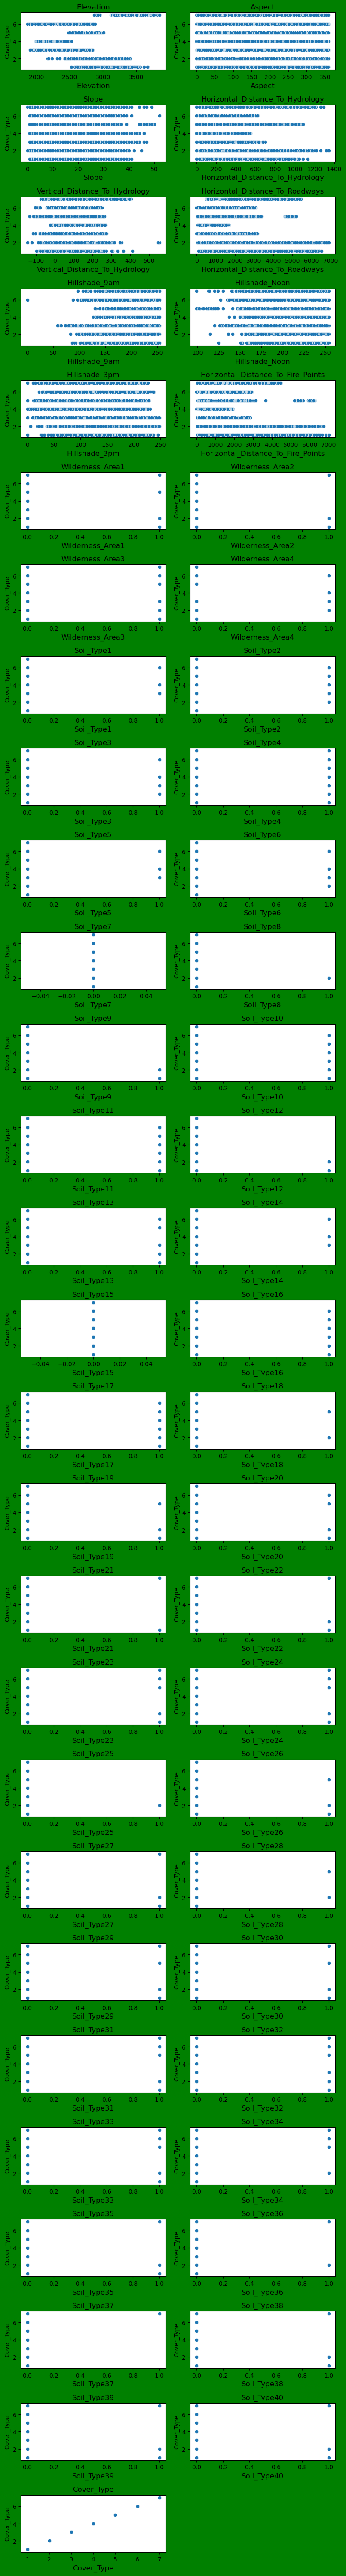

In [153]:
plt.figure(figsize=(8,60),facecolor='green')
plotnumber=1
for i in dt:
    plt.subplot(28,2,plotnumber)
    sns.scatterplot(x=i,y='Cover_Type',data=dt)
    plt.xlabel(i,fontsize=12)
    plt.title(i)
    plotnumber+=1
plt.tight_layout()

## Domain analysis :
* Slope,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,
Vertical_Distance_To_Hydrology,
Horizontal_Distance_To_Fire_Points,Hillshade_9am,Hillshade_Noon.these features to be handle the Outliers.

## Outliers Handling :

In [33]:
dt.loc[dt.Slope>50,'Slope'].value_counts()

Slope
52    1
Name: count, dtype: int64

In [34]:
dt.loc[dt.Horizontal_Distance_To_Hydrology>1300,'Horizontal_Distance_To_Hydrology'].value_counts()

Horizontal_Distance_To_Hydrology
1343    1
1318    1
Name: count, dtype: int64

In [35]:
dt.loc[dt.Horizontal_Distance_To_Roadways>6800,'Horizontal_Distance_To_Roadways'].value_counts()

Horizontal_Distance_To_Roadways
6836    1
6811    1
6890    1
Name: count, dtype: int64

In [36]:
dt.loc[dt.Vertical_Distance_To_Hydrology>420,'Vertical_Distance_To_Hydrology'].value_counts()

Vertical_Distance_To_Hydrology
547    2
554    1
Name: count, dtype: int64

In [37]:
dt.loc[dt.Hillshade_9am<50,'Hillshade_9am'].value_counts()

Hillshade_9am
0    1
Name: count, dtype: int64

In [38]:
dt.loc[dt.Hillshade_Noon<100,'Hillshade_Noon'].value_counts()

Hillshade_Noon
99    4
Name: count, dtype: int64

In [39]:
dt.loc[dt.Hillshade_3pm<0,'Hillshade_3pm'].value_counts()

Series([], Name: count, dtype: int64)

In [40]:
dt.loc[dt.Horizontal_Distance_To_Fire_Points>6800,'Horizontal_Distance_To_Fire_Points'].value_counts()

Horizontal_Distance_To_Fire_Points
6853    1
6993    1
Name: count, dtype: int64

* I have handle the outliers to use scatterplot visualize graph.

## Outliers to be coverted with Nan :

In [41]:
dt.loc[dt.Slope>50,'Slope']=np.nan

In [42]:
dt.loc[dt.Horizontal_Distance_To_Hydrology>1300,'Horizontal_Distance_To_Hydrology']=np.nan

In [43]:
dt.loc[dt.Horizontal_Distance_To_Roadways>6800,'Horizontal_Distance_To_Roadways']=np.nan

In [44]:
dt.loc[dt.Vertical_Distance_To_Hydrology>420,'Vertical_Distance_To_Hydrology']=np.nan

In [45]:
dt.loc[dt.Hillshade_9am<50,'Hillshade_9am']=np.nan

In [46]:
dt.loc[dt.Hillshade_Noon<100,'Hillshade_Noon']=np.nan

In [47]:
dt.loc[dt.Horizontal_Distance_To_Fire_Points>6800,'Horizontal_Distance_To_Fire_Points']=np.nan

## Null value Counts :

In [48]:
dt.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 1
Horizontal_Distance_To_Hydrology      2
Vertical_Distance_To_Hydrology        3
Horizontal_Distance_To_Roadways       3
Hillshade_9am                         1
Hillshade_Noon                        4
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    2
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## Use KNN Imputers :

In [49]:
from sklearn.impute import KNNImputer

In [50]:
impute=KNNImputer()
dt1=impute.fit_transform(dt)
dt1

array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        5.000e+00],
       [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        5.000e+00],
       [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [2.492e+03, 1.340e+02, 2.500e+01, ..., 0.000e+00, 0.000e+00,
        3.000e+00],
       [2.487e+03, 1.670e+02, 2.800e+01, ..., 0.000e+00, 0.000e+00,
        3.000e+00],
       [2.475e+03, 1.970e+02, 3.400e+01, ..., 0.000e+00, 0.000e+00,
        3.000e+00]])

In [51]:
dt2=pd.DataFrame(dt1,columns=dt.columns)

In [52]:
dt2.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0          135.0   
3          238.0           238.0          122.0   
4          220.0           234.0          150.0   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                              6279.0               1.0               0.0   
1                              6225.0               1.0               0.0   
2                              6121.0               1.0               0.0   
3                              6211.0               1.0               0.0   
4                              6172.0               1.0               0.0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0               0.0               0.0         0.0         0.0         0.0   
1               0.0               0.0         0.0         0.0         0.0   
2               0.0               0.0         0.0         0.0         0.0   
3               0.0               0.0         0.0         0.0         0.0   
4               0.0               0.0         0.0         0.0         0.0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          1.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0          0.0          0.0          0.0          0.0          1.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0        

In [53]:
dt2.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## KNN Imputers replace the Outliers and Visualiaze graph :

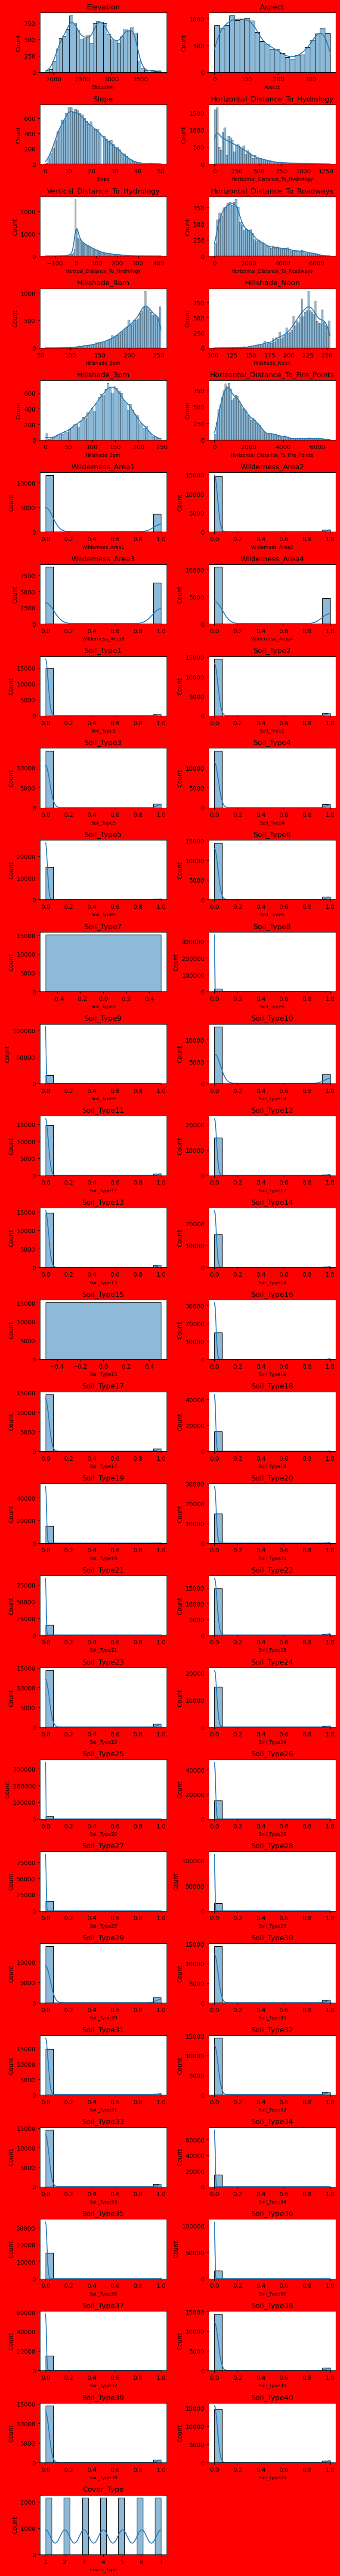

In [179]:
plt.figure(figsize=(8,60),facecolor='red')
plotnumber=1
for i in dt2:
    plt.subplot(28,2,plotnumber)
    sns.histplot(x=i,data=dt2,kde=True)
    plt.xlabel(i,fontsize=8)
    plt.title(i)
    plotnumber+=1
plt.tight_layout()

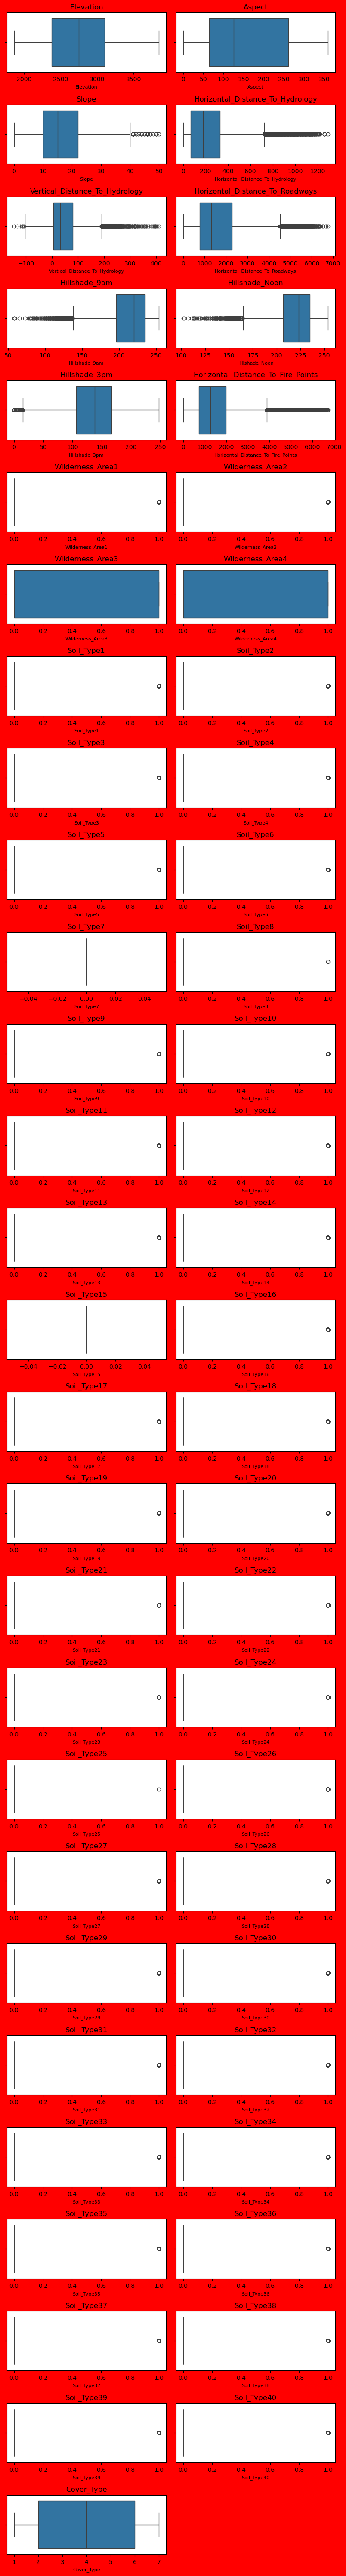

In [180]:
plt.figure(figsize=(8,60),facecolor='red')
plotnumber=1
for i in dt2:
    plt.subplot(28,2,plotnumber)
    sns.boxplot(x=i,data=dt2)
    plt.xlabel(i,fontsize=8)
    plt.title(i)
    plotnumber+=1
plt.tight_layout()

## Drop the features are Soil_Type7 and Soil_Type15 :

In [54]:
dt2.Soil_Type7.value_counts()

Soil_Type7
0.0    15120
Name: count, dtype: int64

In [55]:
dt2.Soil_Type15.unique()

array([0.])

In [56]:
dt2.drop(['Soil_Type7','Soil_Type15'],axis=1,inplace=True) # In this two features no correlations.
                                                        # so those features will removed.

## Correlations :

<Axes: >

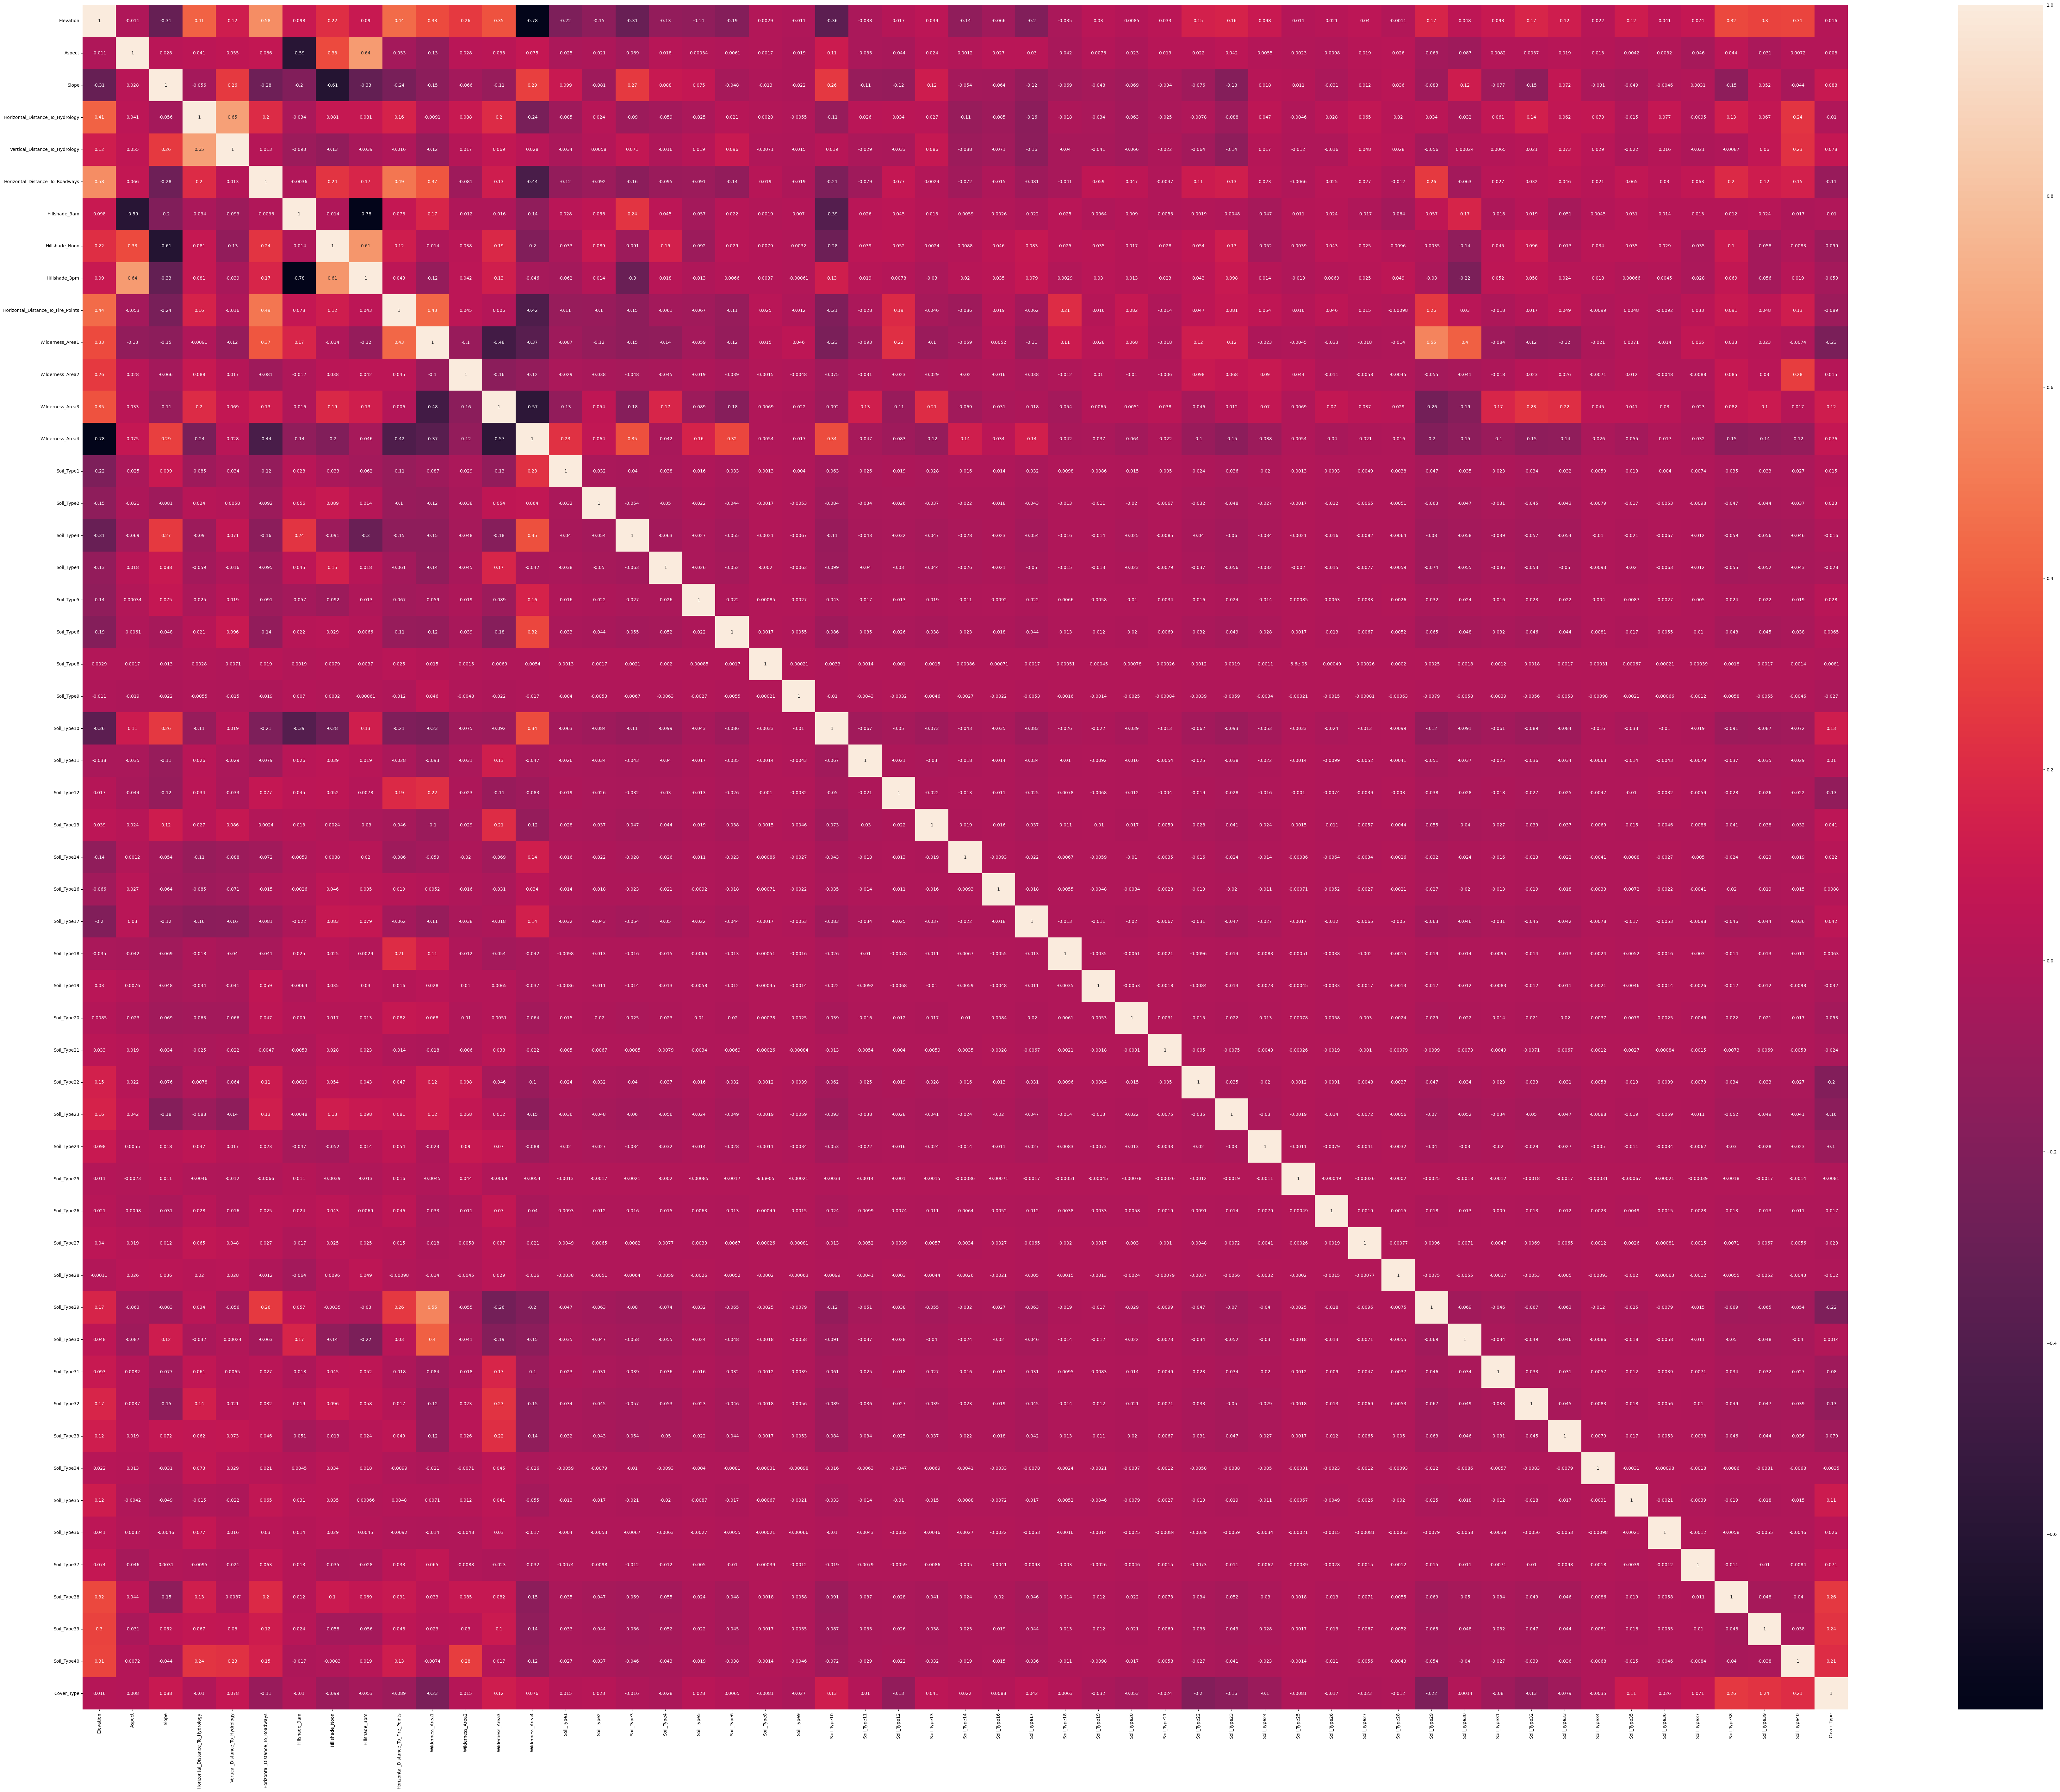

In [57]:
plt.figure(figsize=(90,70))
sns.heatmap(dt2.corr(),annot=True)

## Domain Analysis :
* Soil_Type37 and Soil_Type38,Soil_Type40 features are high correlated the Cover Type Features column.0.25
* Soil_Type30 and Soil_Type34 features are low correlated with target variables.

In [57]:
corr=dt2.corr()
corr

Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312745   
Aspect                              -0.011096  1.000000  0.027892   
Slope                               -0.312745  0.027892  1.000000   
Horizontal_Distance_To_Hydrology     0.412977  0.041269 -0.055912   
Vertical_Distance_To_Hydrology       0.122283  0.055233  0.264970   
Horizontal_Distance_To_Roadways      0.578998  0.066393 -0.277243   
Hillshade_9am                        0.097943 -0.594442 -0.198695   
Hillshade_Noon                       0.216614  0.325239 -0.611572   
Hillshade_3pm                        0.089518  0.635022 -0.327497   
Horizontal_Distance_To_Fire_Points   0.444314 -0.052544 -0.239341   
Wilderness_Area1                     0.330417 -0.131262 -0.152788   
Wilderness_Area2                     0.261729  0.028238 -0.065921   
Wilderness_Area3                     0.354025  0.032578 -0.113337   
Wilderness_Area4                    -0.783651  0.075228  0.287280   
Soil_Type1                          -0.218818 -0.024538  0.099441   
Soil_Type2                          -0.147947 -0.020970 -0.081499   
Soil_Type3                          -0.307523 -0.069120  0.265740   
Soil_Type4                          -0.125342  0.018019  0.087939   
Soil_Type5                          -0.141478  0.000343  0.074782   
Soil_Type6                          -0.187354 -0.006066 -0.047851   
Soil_Type8                           0.002934  0.001723 -0.012995   
Soil_Type9                          -0.010571 -0.019391 -0.022227   
Soil_Type10                         -0.357816  0.111959  0.256028   
Soil_Type11                         -0.037906 -0.034549 -0.109823   
Soil_Type12                          0.017432 -0.044142 -0.115125   
Soil_Type13                          0.039304  0.024312  0.118782   
Soil_Type14                         -0.140619  0.001181 -0.054092   
Soil_Type16                         -0.066252  0.027121 -0.064338   
Soil_Type17                         -0.200663  0.029870 -0.124400   
Soil_Type18                         -0.035173 -0.042140 -0.069351   
Soil_Type19                          0.029808  0.007570 -0.047756   
Soil_Type20                          0.008548 -0.023330 -0.068525   
Soil_Type21                          0.032509  0.018815 -0.033947   
Soil_Type22                          0.146236  0.022301 -0.076403   
Soil_Type23                          0.159872  0.041880 -0.184581   
Soil_Type24                          0.097647  0.005480  0.018019   
Soil_Type25                          0.010586 -0.002340  0.011070   
Soil_Type26                          0.020669 -0.009775 -0.030704   
Soil_Type27                          0.040019  0.018986  0.012309   
Soil_Type28                         -0.001077  0.026330  0.036106   
Soil_Type29                          0.165304 -0.063428 -0.083090   
Soil_Type30                          0.048204 -0.086897  0.118836   
Soil_Type31                          0.093191  0.008160 -0.076862   
Soil_Type32                          0.172349  0.003700 -0.147294   
Soil_Type33                          0.123821  0.018719  0.072109   
Soil_Type34                          0.021876  0.012927 -0.030598   
Soil_Type35                          0.120157 -0.004235 -0.048865   
Soil_Type36                          0.040571  0.003160 -0.004567   
Soil_Type37                          0.073825 -0.046309  0.003141   
Soil_Type38                          0.323440  0.043860 -0.148377   
Soil_Type39                          0.296405 -0.031342  0.051972   
Soil_Type40                          0.306755  0.007208 -0.043500   
Cover_Type                           0.016090  0.008015  0.087563   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412977   
Aspect                                                      0.041269   
Slope                                                      -0.055912   
Horizontal_Distance_T

In [58]:
for i in corr:
    high_corr=corr.loc[abs(corr[i])>0.7]
    for j in high_corr.index:
        if i!=j:
            print(i)

Elevation
Hillshade_9am
Hillshade_3pm
Wilderness_Area4


In [59]:
for i in corr:
    low_cor=corr.loc[abs(corr[i])<0.05]
    for j in low_cor.index:
        if i!=j:
            print(i)

Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Elevation
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Aspect
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Slope
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Hydrology
Horizontal_Dist

In [60]:
dt2.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                              6279.0               1.0               0.0   
1                              6225.0               1.0               0.0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0               0.0               0.0         0.0         0.0         0.0   
1               0.0               0.0         0.0         0.0         0.0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
0         0.0         0.0         0.0         0.0         0.0          0.0   
1         0.0         0.0         0.0         0.0         0.0          0.0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
0          0.0          0.0          1.0          0.0          0.0   
1          0.0          0.0          1.0          0.0          0.0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0          0.0          0.0          0.0          0.0         5.0  
1          0.0          0.0          0.0          0.0         5.0

In [61]:
dt2.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype

In [62]:

dt3=StandardScaler().fit_transform(dt2.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],axis=1))

In [63]:
dt4=pd.DataFrame(dt3,columns=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'])
dt4.head(2)

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -0.367095 -0.959980 -1.597796                          0.147411   
1  -0.381461 -0.914559 -1.716152                         -0.071939   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.838079                        -0.909325   
1                       -0.936696                        -1.000008   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.271534        0.572413       0.281259   
1       0.238765        0.704294       0.346627   

   Horizontal_Distance_To_Fire_Points  
0                            4.342216  
1                            4.293043

In [64]:
dt5=dt2.loc[:,'Wilderness_Area1':]
dt5.head(2)

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
0               1.0               0.0               0.0               0.0   
1               1.0               0.0               0.0               0.0   

   Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          0.0          0.0          0.0          0.0   

   Soil_Type14  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0          0.0          0.0          0.0          0.0          1.0   
1          0.0          0.0          0.0          0.0          1.0   

   Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type40  Cover_Type  
0          0.0         5.0  
1          0.0         5.0

## Concateneation the data :

In [65]:
df=pd.concat([dt4,dt5],axis=1)
df.head(2)

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -0.367095 -0.959980 -1.597796                          0.147411   
1  -0.381461 -0.914559 -1.716152                         -0.071939   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.838079                        -0.909325   
1                       -0.936696                        -1.000008   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.271534        0.572413       0.281259   
1       0.238765        0.704294       0.346627   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                            4.342216               1.0               0.0   
1                            4.293043               1.0               0.0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0               0.0               0.0         0.0         0.0         0.0   
1               0.0               0.0         0.0         0.0         0.0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
0         0.0         0.0         0.0         0.0         0.0          0.0   
1         0.0         0.0         0.0         0.0         0.0          0.0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
0          0.0          0.0          1.0          0.0          0.0   
1          0.0          0.0          1.0          0.0          0.0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0          0.0          0.0          0.0          0.0         5.0  
1          0.0          0.0          0.0          0.0         5.0

## Split the data's :

In [66]:
X=df.loc[:,:'Soil_Type40']
X.head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -0.367095 -0.959980 -1.597796                          0.147411   
1  -0.381461 -0.914559 -1.716152                         -0.071939   
2   0.130912 -0.160577 -0.887656                          0.195095   
3   0.085421 -0.015231  0.177554                          0.071115   
4  -0.369489 -1.014485 -1.716152                         -0.353279   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.838079                        -0.909325   
1                       -0.936696                        -1.000008   
2                        0.230276                         1.108369   
3                        1.101396                         1.040357   
4                       -0.854515                        -0.999253   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.271534        0.572413       0.281259   
1       0.238765        0.704294       0.346627   
2       0.697530        0.836175      -0.002005   
3       0.828606        0.836175      -0.285268   
4       0.238765        0.660334       0.324838   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                            4.342216               1.0               0.0   
1                            4.293043               1.0               0.0   
2                            4.198340               1.0               0.0   
3                            4.280295               1.0               0.0   
4                            4.244781               1.0               0.0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0               0.0               0.0         0.0         0.0         0.0   
1               0.0               0.0         0.0         0.0         0.0   
2               0.0               0.0         0.0         0.0         0.0   
3               0.0               0.0         0.0         0.0         0.0   
4               0.0               0.0         0.0         0.0         0.0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
0         0.0         0.0         0.0         0.0         0.0          0.0   
1         0.0         0.0         0.0         0.0         0.0          0.0   
2         0.0         0.0         0.0         0.0         0.0          0.0   
3         0.0         0.0         0.0         0.0         0.0          0.0   
4         0.0         0.0         0.0         0.0         0.0          0.0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          1.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
0          0.0          0.0          1.0          0.0          0.0   
1          0.0          0.0          1.0          0.0   

In [67]:
y=df.Cover_Type.astype(int)# the output columns are float value. we will convert the integar type.
y=y-1 # the output columns are 1 to 7 unique values.but actually 0 to 6 will converted.
y

0        4
1        4
2        1
3        1
4        4
        ..
15115    2
15116    2
15117    2
15118    2
15119    2
Name: Cover_Type, Length: 15120, dtype: int32

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (12096, 52)
X_test (3024, 52)
y_train (12096,)
y_test (3024,)


In [158]:
len(X.columns)

52

In [70]:
y_train.value_counts()

Cover_Type
4    1744
0    1739
2    1732
5    1728
1    1722
6    1720
3    1711
Name: count, dtype: int64

## Implement the Model :

In [71]:
model_logistic=LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_pred_logistic=model_logistic.predict(X_test)
y_pred_logistic

array([3, 5, 6, ..., 4, 3, 3])

## Evaluate the Metrics :

In [73]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [74]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       421
           1       0.65      0.53      0.58       438
           2       0.64      0.53      0.58       428
           3       0.77      0.88      0.83       449
           4       0.69      0.79      0.74       416
           5       0.62      0.63      0.63       432
           6       0.91      0.90      0.91       440

    accuracy                           0.71      3024
   macro avg       0.71      0.71      0.71      3024
weighted avg       0.71      0.71      0.71      3024



In [75]:
pd.crosstab(y_test,y_pred_logistic)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           296   66    0    0   23    0   36
1           102  232    9    0   78   12    5
2             0    2  227   62   18  119    0
3             0    0   33  397    0   19    0
4             4   57    8    0  329   18    0
5             0    1   79   54   24  274    0
6            40    0    0    0    2    0  398

In [76]:
f1_score_logistic=f1_score(y_test,y_pred_logistic,average='micro')
f1_score_logistic

0.7119708994708994

In [79]:
test_accuracy_logistic=accuracy_score(y_test,y_pred_logistic)
test_accuracy_logistic

0.7119708994708994

## Logistic training accuracy :

In [81]:
y_pred_logistic_train=model_logistic.predict(X_train)
y_pred_logistic_train

array([2, 4, 1, ..., 1, 1, 6])

In [82]:
train_accuracy_logistic=accuracy_score(y_train,y_pred_logistic_train) ## logistic no diff train and test
train_accuracy_logistic

0.7127976190476191

## GridSearchCV hyper Parameter :

In [83]:
params_logistic={'penalty':['l1','l2','elasticnet',None],
                'max_iter':list(range(100,300,10)),
                 'solver':['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                }

In [ ]:
penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None

In [81]:
gridsearch_logistic=RandomizedSearchCV(model_logistic,param_distributions=params_logistic,verbose=2,cv=3,scoring='f1')
gridsearch_logistic.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .........max_iter=260, penalty=l1, solver=liblinear; total time=   7.7s
[CV] END .........max_iter=260, penalty=l1, solver=liblinear; total time=   6.7s
[CV] END .........max_iter=260, penalty=l1, solver=liblinear; total time=   6.8s
[CV] END ..............max_iter=150, penalty=l2, solver=saga; total time=   5.0s
[CV] END ..............max_iter=150, penalty=l2, solver=saga; total time=   5.0s
[CV] END ..............max_iter=150, penalty=l2, solver=saga; total time=   4.9s
[CV] END ......max_iter=130, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......max_iter=130, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......max_iter=130, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............max_iter=240, penalty=None, solver=sag; total time=   6.9s
[CV] END .............max_iter=240, penalty=None, solver=sag; total time=   6.9s
[CV] END .............max_iter=240, penalty=None

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 110, 120, 130, 140,
                                                     150, 160, 170, 180, 190,
                                                     200, 210, 220, 230, 240,
                                                     250, 260, 270, 280, 290],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='f1', verbose=2)

In [82]:
gridsearch_logistic.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 260}

In [84]:
model_logistic_hyper=LogisticRegression(solver='liblinear',penalty='l1',max_iter=260)
model_logistic_hyper.fit(X_train,y_train)

LogisticRegression(max_iter=260, penalty='l1', solver='liblinear')

In [85]:
y_pred_logistic_hyper=model_logistic_hyper.predict(X_test)
y_pred_logistic_hyper

array([3, 5, 6, ..., 4, 2, 3])

In [86]:
print(classification_report(y_test,y_pred_logistic_hyper))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       421
           1       0.61      0.48      0.53       438
           2       0.57      0.52      0.54       428
           3       0.77      0.90      0.83       449
           4       0.63      0.72      0.67       416
           5       0.59      0.58      0.58       432
           6       0.89      0.89      0.89       440

    accuracy                           0.68      3024
   macro avg       0.67      0.68      0.67      3024
weighted avg       0.67      0.68      0.67      3024



In [87]:
pd.crosstab(y_test,y_pred_logistic_hyper)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           275   71    2    0   31    1   41
1           104  209   16    0   89   12    8
2             0    3  221   64   15  125    0
3             0    0   31  404    0   14    0
4            11   45   40    0  301   19    0
5             1   13   75   54   40  249    0
6            42    3    2    0    2    0  391

In [88]:
f1_score_logistic_hyper=f1_score(y_test,y_pred_logistic_hyper,average='micro')
f1_score_logistic_hyper

0.6779100529100529

In [91]:
test_accuracy_logictic_hyper=accuracy_score(y_test,y_pred_logistic)
test_accuracy_logictic_hyper

0.7119708994708994

In [90]:
confusion_matrix(y_test,y_pred_logistic)

array([[296,  66,   0,   0,  23,   0,  36],
       [102, 232,   9,   0,  78,  12,   5],
       [  0,   2, 227,  62,  18, 119,   0],
       [  0,   0,  33, 397,   0,  19,   0],
       [  4,  57,   8,   0, 329,  18,   0],
       [  0,   1,  79,  54,  24, 274,   0],
       [ 40,   0,   0,   0,   2,   0, 398]], dtype=int64)

## Common Averaging Methods for Multi-Class/Multi-Label:
#### average='micro':

* Calculates metrics globally by counting the total true positives, false negatives, and false positives across all classes.
* Best when you want to treat all classes equally, and you’re interested in the overall performance across all instances.
#### average='macro':

* Calculates metrics for each label, and then takes an unweighted mean of these metrics.
* Best when you want to treat all classes equally, regardless of their frequency.
#### average='weighted':

* Similar to macro, but the metrics are weighted by the number of true instances for each label.
* Best when you want to account for class imbalance, giving more importance to classes with more instances.
#### average=None:

* Returns the metrics for each class individually, without averaging them.
* Best if you want to inspect the performance for each class separately.

### Choosing the Right Averaging Method:
* micro: Use when you care about overall accuracy and class imbalance doesn’t concern you.
* macro: Use when you want to evaluate the model’s ability to perform well across all classes equally.
* weighted: Use when class imbalance is significant, and you want to give more weight to classes with more instances.
* None: Use when you need detailed metrics for each class.

## Random Forest :

In [97]:
model_random=RandomForestClassifier(random_state=42)
model_random.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_pred_random=model_random.predict(X_test)
y_pred_random

array([5, 2, 0, ..., 4, 3, 3])

In [99]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       421
           1       0.83      0.71      0.77       438
           2       0.84      0.81      0.83       428
           3       0.92      0.98      0.95       449
           4       0.88      0.96      0.92       416
           5       0.85      0.86      0.85       432
           6       0.95      0.97      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [100]:
f1_score_random=f1_score(y_test,y_pred_random,average='micro')
f1_score_random

0.8700396825396826

In [107]:
test_accuracy_random=accuracy_score(y_test,y_pred_random)
test_accuracy_random

0.8700396825396826

In [108]:
confusion_matrix(y_test,y_pred_random)

array([[332,  53,   0,   0,  14,   0,  22],
       [ 73, 312,  13,   0,  31,   7,   2],
       [  0,   0, 348,  23,   4,  53,   0],
       [  0,   0,   4, 441,   0,   4,   0],
       [  1,   4,   9,   0, 400,   2,   0],
       [  0,   4,  38,  15,   4, 371,   0],
       [ 12,   1,   0,   0,   0,   0, 427]], dtype=int64)

In [109]:
pd.crosstab(y_test,y_pred_random)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           332   53    0    0   14    0   22
1            73  312   13    0   31    7    2
2             0    0  348   23    4   53    0
3             0    0    4  441    0    4    0
4             1    4    9    0  400    2    0
5             0    4   38   15    4  371    0
6            12    1    0    0    0    0  427

# Training accuracy :

In [110]:
y_pred_random_train=model_random.predict(X_train)
y_pred_random_train

array([2, 4, 1, ..., 1, 4, 6])

In [111]:
train_accuracy_random=accuracy_score(y_train,y_pred_random_train)
train_accuracy_random

1.0

## GridSearchCV hyper Parameter Random Forest :

In [102]:
params_random={'n_estimators':list(range(100,350,10)),
               'criterion':['gini','entropy'],
              'max_depth':list(range(150)),
              'min_samples_split':list(range(2,10)),
              'min_samples_leaf':list(range(1,10)),
              }

In [ ]:
n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,

In [273]:
gridsearch_random=RandomizedSearchCV(model_random,param_distributions=params_random,verbose=1,cv=5,scoring='f1')
gridsearch_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240, 250,
                                                         260, 270, 280, 290,
                                                         300, 310, 320, 330,
                                                         340]},
                   scoring='f1', verbose=1)

In [274]:
gridsearch_random.best_params_

{'n_estimators': 260,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_depth': 145,
 'criterion': 'entropy'}

In [112]:
model_random_hyper=RandomForestClassifier(n_estimators=260,min_samples_leaf=7,min_samples_split=9,max_depth=145,criterion='entropy')
model_random_hyper.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=145, min_samples_leaf=7,
                       min_samples_split=9, n_estimators=260)

In [113]:
y_pred_random_hyper=model_random_hyper.predict(X_test)
y_pred_random_hyper

array([5, 5, 0, ..., 4, 3, 3])

In [114]:
print(classification_report(y_test,y_pred_random_hyper))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       421
           1       0.81      0.63      0.71       438
           2       0.80      0.77      0.78       428
           3       0.88      0.98      0.93       449
           4       0.84      0.94      0.89       416
           5       0.82      0.80      0.81       432
           6       0.93      0.96      0.94       440

    accuracy                           0.83      3024
   macro avg       0.83      0.83      0.83      3024
weighted avg       0.83      0.83      0.83      3024



In [115]:
f1_score_random_hyper=f1_score(y_test,y_pred_random_hyper,average='micro')
f1_score_random_hyper

0.8333333333333334

In [121]:
test_accuracy_random=accuracy_score(y_test,y_pred_random_hyper)
test_accuracy_random

0.8333333333333334

In [117]:
pd.crosstab(y_test,y_pred_random_hyper)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           317   51    0    0   24    0   29
1            97  276   14    0   41    7    3
2             0    0  328   34    3   63    0
3             0    0    2  441    0    6    0
4             1    8   12    0  393    2    0
5             0    6   52   25    5  344    0
6            17    0    2    0    0    0  421

In [118]:
confusion_matrix(y_test,y_pred_random_hyper)

array([[317,  51,   0,   0,  24,   0,  29],
       [ 97, 276,  14,   0,  41,   7,   3],
       [  0,   0, 328,  34,   3,  63,   0],
       [  0,   0,   2, 441,   0,   6,   0],
       [  1,   8,  12,   0, 393,   2,   0],
       [  0,   6,  52,  25,   5, 344,   0],
       [ 17,   0,   2,   0,   0,   0, 421]], dtype=int64)

## train_accuracy_random_hyper :

In [119]:
y_pred_random_train=model_random_hyper.predict(X_train)
y_pred_random_train

array([2, 4, 1, ..., 1, 4, 6])

In [120]:
train_accuracy_random_hyper=accuracy_score(y_train,y_pred_random_train)
train_accuracy_random_hyper

0.8991402116402116

## Decision Tree :

In [122]:
model_decision=DecisionTreeClassifier(random_state=42)
model_decision.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [123]:
y_pred_decision=model_decision.predict(X_test)
y_pred_decision

array([5, 5, 0, ..., 4, 3, 3])

In [124]:
f1_score_decision=f1_score(y_test,y_pred_decision,average='micro')
f1_score_decision

0.792989417989418

In [126]:
test_accuracy_decision=accuracy_score(y_test,y_pred_decision)
test_accuracy_decision

0.792989417989418

In [127]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       421
           1       0.66      0.59      0.62       438
           2       0.77      0.73      0.75       428
           3       0.91      0.95      0.93       449
           4       0.84      0.90      0.87       416
           5       0.76      0.76      0.76       432
           6       0.92      0.92      0.92       440

    accuracy                           0.79      3024
   macro avg       0.79      0.79      0.79      3024
weighted avg       0.79      0.79      0.79      3024



In [128]:
confusion_matrix(y_test,y_pred_decision)

array([[292,  88,   0,   0,  10,   1,  30],
       [107, 260,  10,   1,  47,   7,   6],
       [  0,   8, 313,  23,   5,  79,   0],
       [  0,   0,  14, 427,   0,   8,   0],
       [  6,  23,   7,   0, 374,   6,   0],
       [  2,  12,  63,  20,   7, 328,   0],
       [ 32,   3,   1,   0,   0,   0, 404]], dtype=int64)

In [129]:
pd.crosstab(y_test,y_pred_decision)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           292   88    0    0   10    1   30
1           107  260   10    1   47    7    6
2             0    8  313   23    5   79    0
3             0    0   14  427    0    8    0
4             6   23    7    0  374    6    0
5             2   12   63   20    7  328    0
6            32    3    1    0    0    0  404

## train accuracy decision tree :

In [130]:
y_pred_decision_train=model_decision.predict(X_train)
y_pred_decision_train

array([2, 4, 1, ..., 1, 4, 6])

In [131]:
train_accuracy_decision=accuracy_score(y_train,y_pred_decision_train)
train_accuracy_decision

1.0

In [157]:
diff=train_accuracy_decision-test_accuracy_decision
diff

0.20701058201058198

## Gridsearch Hyper Parameter Decision Tree :

In [144]:
params_decision={'criterion':['gini','entropy'],
                 'splitter':['best','random'],
                 'max_depth':list(range(150)),
                 'min_samples_split':list(range(2,10)),
                 'min_samples_leaf':list(range(1,10)),
                 'max_leaf_nodes':list(range(15))
                 
              }

In [ ]:
criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,

In [145]:
gridsearch_decision=RandomizedSearchCV(model_decision,param_distributions=params_decision,verbose=1,cv=5,scoring='f1')
gridsearch_decision.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9, 10, 11, 12,
                                                           13, 14],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'splitter': ['best', 'random']},
                   scoring='f1', verbose=1)

In [146]:
gridsearch_decision.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 6,
 'max_depth': 40,
 'criterion': 'entropy'}

In [165]:
model_decision_hyper=DecisionTreeClassifier(splitter='random',min_samples_leaf=6,min_samples_split=9,
                                            max_leaf_nodes=6,max_depth=40,criterion='entropy',
                                           class_weight={4:1,0:5,1:5,2:5,3:5,5:5,6:5})
model_decision.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [166]:
y_pred_decision_hyper=model_decision.predict(X_test)
y_pred_decision_hyper

array([5, 5, 0, ..., 4, 3, 3])

In [167]:
print(classification_report(y_test,y_pred_decision_hyper))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       421
           1       0.66      0.59      0.62       438
           2       0.77      0.73      0.75       428
           3       0.91      0.95      0.93       449
           4       0.84      0.90      0.87       416
           5       0.76      0.76      0.76       432
           6       0.92      0.92      0.92       440

    accuracy                           0.79      3024
   macro avg       0.79      0.79      0.79      3024
weighted avg       0.79      0.79      0.79      3024



In [168]:
f1_score_decision_hyper=f1_score(y_test,y_pred_decision_hyper,average='micro')
f1_score_decision_hyper

0.792989417989418

In [169]:
test__accuracy_score_test_decision_hyper=accuracy_score(y_test,y_pred_decision_hyper)
test__accuracy_score_test_decision_hyper

0.792989417989418

In [164]:
pd.crosstab(y_test,y_pred_decision_hyper)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           292   88    0    0   10    1   30
1           107  260   10    1   47    7    6
2             0    8  313   23    5   79    0
3             0    0   14  427    0    8    0
4             6   23    7    0  374    6    0
5             2   12   63   20    7  328    0
6            32    3    1    0    0    0  404

In [153]:
confusion_matrix(y_test,y_pred_decision_hyper)

array([[292,  88,   0,   0,  10,   1,  30],
       [107, 260,  10,   1,  47,   7,   6],
       [  0,   8, 313,  23,   5,  79,   0],
       [  0,   0,  14, 427,   0,   8,   0],
       [  6,  23,   7,   0, 374,   6,   0],
       [  2,  12,  63,  20,   7, 328,   0],
       [ 32,   3,   1,   0,   0,   0, 404]], dtype=int64)

## train accuracy score decision hyper :

In [154]:
y_pred_train_decision_hyper=model_decision.predict(X_train) ## Decision tree is overfitting issues.
y_pred_train_decision_hyper

array([2, 4, 1, ..., 1, 4, 6])

In [155]:
train_accuracy_decision_hyper=accuracy_score(y_train,y_pred_train_decision_hyper)
train_accuracy_decision_hyper

1.0

In [156]:
print(classification_report(y_train,y_pred_train_decision_hyper)) ## our training datasets 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1722
           2       1.00      1.00      1.00      1732
           3       1.00      1.00      1.00      1711
           4       1.00      1.00      1.00      1744
           5       1.00      1.00      1.00      1728
           6       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096



## SVM:

In [170]:
from sklearn.svm import SVC

In [175]:
model_svc=SVC(random_state=42)
model_svc.fit(X_train,y_train)

SVC(random_state=42)

In [176]:
y_pred_svc=model_svc.predict(X_test)
y_pred_svc

array([2, 5, 0, ..., 4, 3, 3])

In [177]:
f1_score_svm=f1_score(y_test,y_pred_svc,average='micro')
f1_score_svm

0.792989417989418

In [181]:
test_accuracy_score_svm=accuracy_score(y_test,y_pred_svc)
test_accuracy_score_svm

0.792989417989418

In [179]:
pd.crosstab(y_test,y_pred_svc)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           315   64    0    0   16    2   24
1            89  275   15    1   45    8    5
2             0    1  294   43    8   82    0
3             0    0    9  431    0    9    0
4             5   20   17    0  366    8    0
5             0    8   69   44    4  307    0
6            30    0    0    0    0    0  410

In [180]:
confusion_matrix(y_test,y_pred_svc)

array([[315,  64,   0,   0,  16,   2,  24],
       [ 89, 275,  15,   1,  45,   8,   5],
       [  0,   1, 294,  43,   8,  82,   0],
       [  0,   0,   9, 431,   0,   9,   0],
       [  5,  20,  17,   0, 366,   8,   0],
       [  0,   8,  69,  44,   4, 307,   0],
       [ 30,   0,   0,   0,   0,   0, 410]], dtype=int64)

## train accuracy score svm :

In [183]:
y_pred_svm_train=model_svc.predict(X_train)
y_pred_svm_train

array([2, 4, 1, ..., 4, 4, 6])

In [185]:
train_accuracy_score_svm=accuracy_score(y_train,y_pred_svm_train)
train_accuracy_score_svm

0.8069609788359788

## Grid searchCV hyper parameter SVM :

In [138]:
params_svc={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
           'gamma':['scale','auto'],
           'degree':list(range(10))
           }

In [ ]:
C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,

In [140]:
gridsearch_svc=RandomizedSearchCV(model_svc,param_distributions=params_svc,verbose=1,cv=3,scoring='f1')
gridsearch_svc.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='f1', verbose=1)

In [141]:
gridsearch_svc.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 8}

In [187]:
model_svc_hyper=SVC(kernel='rbf',gamma='scale',degree=8)
model_svc_hyper.fit(X_train,y_train)

SVC(degree=8)

In [188]:
y_pred_svc_hyper=model_svc_hyper.predict(X_test)
y_pred_svc_hyper

array([2, 5, 0, ..., 4, 3, 3])

In [189]:
f1_score_svm_hyper=f1_score(y_test,y_pred_svc_hyper,average='micro')
f1_score_svm_hyper

0.792989417989418

In [190]:
print(classification_report(y_test,y_pred_svc_hyper))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       421
           1       0.75      0.63      0.68       438
           2       0.73      0.69      0.71       428
           3       0.83      0.96      0.89       449
           4       0.83      0.88      0.86       416
           5       0.74      0.71      0.72       432
           6       0.93      0.93      0.93       440

    accuracy                           0.79      3024
   macro avg       0.79      0.79      0.79      3024
weighted avg       0.79      0.79      0.79      3024



In [191]:
test_accuracy_score_svm_hyper=accuracy_score(y_test,y_pred_svc_hyper)
test_accuracy_score_svm_hyper

0.792989417989418

In [192]:
confusion_matrix(y_test,y_pred_svc_hyper)

array([[315,  64,   0,   0,  16,   2,  24],
       [ 89, 275,  15,   1,  45,   8,   5],
       [  0,   1, 294,  43,   8,  82,   0],
       [  0,   0,   9, 431,   0,   9,   0],
       [  5,  20,  17,   0, 366,   8,   0],
       [  0,   8,  69,  44,   4, 307,   0],
       [ 30,   0,   0,   0,   0,   0, 410]], dtype=int64)

In [193]:
pd.crosstab(y_test,y_pred_svc_hyper)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           315   64    0    0   16    2   24
1            89  275   15    1   45    8    5
2             0    1  294   43    8   82    0
3             0    0    9  431    0    9    0
4             5   20   17    0  366    8    0
5             0    8   69   44    4  307    0
6            30    0    0    0    0    0  410

## train accuracy score svm hyper :

In [194]:
y_pred_svc_hyper_train=model_svc_hyper.predict(X_train)
y_pred_svc_hyper_train

array([2, 4, 1, ..., 4, 4, 6])

In [195]:
train_accuracy_score_svm_hyper=accuracy_score(y_train,y_pred_svc_hyper_train)
train_accuracy_score_svm_hyper

0.8069609788359788

## ANN :

In [210]:
from sklearn.neural_network import MLPClassifier

In [211]:
model_ann=MLPClassifier(random_state=42)
model_ann.fit(X_train,y_train)

MLPClassifier(random_state=42)

In [202]:
y_pred_ann=model_ann.predict(X_test)
y_pred_ann

array([2, 5, 0, ..., 4, 3, 3])

In [203]:
f1_score_ann=f1_score(y_test,y_pred_ann,average='micro')
f1_score_ann

0.8283730158730159

In [204]:
test_accuracy_score_ann=accuracy_score(y_test,y_pred_ann)
test_accuracy_score_ann

0.8283730158730159

In [205]:
pd.crosstab(y_test,y_pred_ann)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           304   76    0    0   17    0   24
1            76  292   15    0   43    8    4
2             0    2  335   24    5   62    0
3             0    0    6  436    0    7    0
4             1   17   11    0  383    4    0
5             0    4   72   19    5  332    0
6            15    2    0    0    0    0  423

In [206]:
confusion_matrix(y_test,y_pred_ann)

array([[304,  76,   0,   0,  17,   0,  24],
       [ 76, 292,  15,   0,  43,   8,   4],
       [  0,   2, 335,  24,   5,  62,   0],
       [  0,   0,   6, 436,   0,   7,   0],
       [  1,  17,  11,   0, 383,   4,   0],
       [  0,   4,  72,  19,   5, 332,   0],
       [ 15,   2,   0,   0,   0,   0, 423]], dtype=int64)

## train accuracy score ann :

In [207]:
y_pred_ann_train=model_ann.predict(X_train)
y_pred_ann_train

array([2, 4, 1, ..., 1, 4, 6])

In [209]:
train_accuracy_score_ann=accuracy_score(y_train,y_pred_ann_train)
train_accuracy_score_ann

0.8783068783068783

## Gridsearchcv hyper parameter ANN :

In [180]:
params_ann={'hidden_layer_sizes':(100,3),
           'activation':['relu','logistic', 'tanh'],
           'solver':['adam','sgd','lbfgs'],
           'batch_size':list(range(50,100,10))
           }

In [ ]:
hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,

In [181]:
gridsearch_ann=RandomizedSearchCV(model_ann,param_distributions=params_ann,verbose=1,cv=3,scoring='f1')
gridsearch_ann.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'logistic',
                                                       'tanh'],
                                        'batch_size': [50, 60, 70, 80, 90],
                                        'hidden_layer_sizes': (100, 3),
                                        'solver': ['adam', 'sgd', 'lbfgs']},
                   scoring='f1', verbose=1)

In [182]:
gridsearch_ann.best_params_

{'solver': 'sgd',
 'hidden_layer_sizes': 3,
 'batch_size': 50,
 'activation': 'logistic'}

In [212]:
model_ann_hyper=MLPClassifier(solver='adam',hidden_layer_sizes=3,batch_size=50,activation='relu')
model_ann_hyper.fit(X_train,y_train)

MLPClassifier(batch_size=50, hidden_layer_sizes=3)

In [213]:
y_pred_ann_hyper=model_ann_hyper.predict(X_test)
y_pred_ann_hyper

array([3, 5, 6, ..., 4, 3, 3])

In [214]:
f1_score_ann_hyper=f1_score(y_test,y_pred_ann_hyper,average='micro')
f1_score_ann_hyper

0.6908068783068783

In [215]:
accuracy_score(y_test,y_pred_ann_hyper)

0.6908068783068783

In [216]:
pd.crosstab(y_test,y_pred_ann_hyper)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           298   61    0    0   23    0   39
1           123  202    3    0   89   16    5
2             0    0  188   79   28  133    0
3             0    0   16  424    0    9    0
4             0   56   10    0  336   14    0
5             0    7  116   42   20  247    0
6            44    0    0    0    2    0  394

In [217]:
print(classification_report(y_test,y_pred_ann_hyper))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       421
           1       0.62      0.46      0.53       438
           2       0.56      0.44      0.49       428
           3       0.78      0.94      0.85       449
           4       0.67      0.81      0.74       416
           5       0.59      0.57      0.58       432
           6       0.90      0.90      0.90       440

    accuracy                           0.69      3024
   macro avg       0.68      0.69      0.68      3024
weighted avg       0.68      0.69      0.68      3024



## train accuracy score ann hyper :

In [218]:
y_pred_ann_hyper=model_ann_hyper.predict(X_train)
y_pred_ann_hyper

array([5, 4, 0, ..., 4, 1, 6])

In [220]:
train_accuracy_score_ann_hyper=accuracy_score(y_train,y_pred_ann_hyper)
train_accuracy_score_ann_hyper

0.6905588624338624

## Naive Bayes theorems :

In [221]:
from sklearn.naive_bayes import BernoulliNB

In [222]:
model_naive=BernoulliNB()
model_naive.fit(X_train,y_train)

BernoulliNB()

In [223]:
y_pred_naive=model_naive.predict(X_test)
y_pred_naive

array([3, 5, 6, ..., 4, 2, 3])

In [224]:
f1_score_naive=f1_score(y_test,y_pred_naive,average='micro')
f1_score_naive

0.6140873015873016

In [228]:
test_accuracy_score_naive=accuracy_score(y_test,y_pred_naive)
test_accuracy_score_naive

0.6140873015873016

In [229]:
pd.crosstab(y_test,y_pred_naive)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           246   83    2    0   38    0   52
1           128  170    7    2   92   10   29
2             0    4  153  107   35  129    0
3             0    0   37  398    0   14    0
4            63   47   10    0  279   15    2
5             3    8   74   72   43  232    0
6            37   16    0    0    8    0  379

## train accuracy score naive :

In [231]:
y_pred_naive_train=model_naive.predict(X_train)
y_pred_naive_train

array([5, 4, 0, ..., 4, 0, 6])

In [232]:
train_accuracy_score_naive=accuracy_score(y_train,y_pred_naive_train)
train_accuracy_score_naive

0.6135912698412699

In [230]:
print("Unique values in y_test:", len(set(y_test)))
print("Unique values in y_pred:", len(set(y_pred_naive)))

Unique values in y_test: 7
Unique values in y_pred: 7


## XGBoost Algorithms :

In [233]:
from xgboost import XGBClassifier

In [234]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [235]:
y_pred_xgb=model_xgb.predict(X_test)
y_pred_xgb

array([5, 2, 0, ..., 4, 3, 3], dtype=int64)

In [236]:
f1_score_xgb=f1_score(y_test,y_pred_xgb,average='micro')
f1_score_xgb

0.8647486772486772

In [240]:
test_accuracy_score_xgb=accuracy_score(y_test,y_pred_xgb)
test_accuracy_score_xgb

0.8647486772486772

In [238]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       421
           1       0.79      0.68      0.73       438
           2       0.84      0.83      0.84       428
           3       0.95      0.98      0.96       449
           4       0.88      0.94      0.91       416
           5       0.85      0.86      0.86       432
           6       0.94      0.97      0.96       440

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024



In [239]:
pd.crosstab(y_test,y_pred_xgb)

col_0         0    1    2    3    4    5    6
Cover_Type                                   
0           329   60    0    0    9    0   23
1            81  299   10    0   40    6    2
2             0    0  357   16    3   52    0
3             0    0    7  438    0    4    0
4             0   14    9    0  392    1    0
5             0    5   44    8    4  371    0
6            10    1    0    0    0    0  429

* Diagonal values indicate correct classifications.
* Off-diagonal values indicate misclassifications.
* The row and column totals (All) give you the marginal totals for actual and predicted labels, respectively.
* This matrix is very useful for understanding the performance of your classifier across different classes.

## train accuracy score xgboost 

In [241]:
y_pred_xgb_train=model_xgb.predict(X_train)
y_pred_xgb_train

array([2, 4, 1, ..., 1, 4, 6], dtype=int64)

In [242]:
train_accuracy_score_xgb=accuracy_score(y_train,y_pred_xgb_train)
train_accuracy_score_xgb

0.9910714285714286

## ExtraTreesClassifier :

In [243]:
from sklearn.ensemble import ExtraTreesClassifier


In [244]:
model_extra=ExtraTreesClassifier()
model_extra.fit(X_train,y_train)

ExtraTreesClassifier()

In [245]:
y_pred_extra=model_extra.predict(X_test)
y_pred_extra

array([5, 2, 0, ..., 4, 3, 3])

In [246]:
f1_score_extra=f1_score(y_test,y_pred_extra,average='micro')
f1_score_extra

0.8733465608465608

In [254]:
test_accuracy_score_extra=accuracy_score(y_test,y_pred_extra)
test_accuracy_score_extra

0.8733465608465608

## train accuracy score Extra Tree classifier :

In [247]:
y_pred_extra_tr=model_extra.predict(X_train)
y_pred_extra_tr

array([2, 4, 1, ..., 1, 4, 6])

In [255]:
train_accuracy_score_extra=accuracy_score(y_train,y_pred_extra_tr)
train_accuracy_score_extra

1.0

## graph charts :

In [2]:
scores={'f1_score_logistic':71,'f1_score_logistic_hyper':67,'f1_score_random':87,'f1_score_random_hyper':82,\
       'f1_score_decision':79,'f1_score_decision_hyper':79,'f1_score_svm':79,'f1_score_svm_hyper':79,\
        'f1_score_ann':83,'f1_score_ann_hyper':69,'f1_score_naive':61,'f1_score_xgb':86,\
        'f1_score_extra':87}
score_key=scores.keys()
score_value=scores.values()

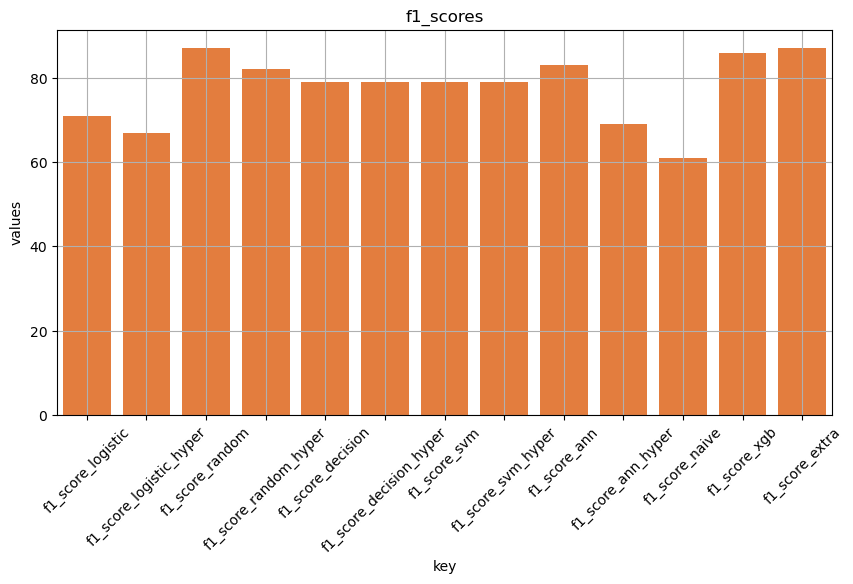

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x=score_key,y=score_value,color='#FF7722')
plt.xlabel('key')
plt.ylabel('values')
plt.title('f1_scores')
plt.xticks(rotation=45)
plt.grid()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'f1_score_logistic'),
  Text(1, 0, 'f1_score_logistic_hyper'),
  Text(2, 0, 'f1_score_random'),
  Text(3, 0, 'f1_score_random_hyper'),
  Text(4, 0, 'f1_score_decision'),
  Text(5, 0, 'f1_score_decision_hyper'),
  Text(6, 0, 'f1_score_svm'),
  Text(7, 0, 'f1_score_svm_hyper'),
  Text(8, 0, 'f1_score_ann'),
  Text(9, 0, 'f1_score_ann_hyper'),
  Text(10, 0, 'f1_score_naive'),
  Text(11, 0, 'f1_score_xgb'),
  Text(12, 0, 'f1_score_extra')])

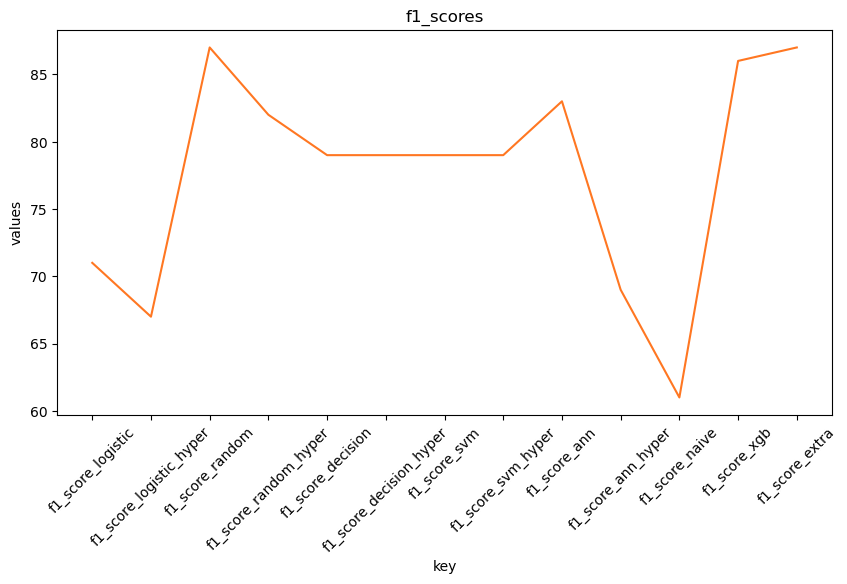

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x=score_key,y=score_value,color='#FF7722')
plt.xlabel('key')
plt.ylabel('values')
plt.title('f1_scores')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'f1_score_logistic'),
  Text(1, 0, 'f1_score_logistic_hyper'),
  Text(2, 0, 'f1_score_random'),
  Text(3, 0, 'f1_score_random_hyper'),
  Text(4, 0, 'f1_score_decision'),
  Text(5, 0, 'f1_score_decision_hyper'),
  Text(6, 0, 'f1_score_svm'),
  Text(7, 0, 'f1_score_svm_hyper'),
  Text(8, 0, 'f1_score_ann'),
  Text(9, 0, 'f1_score_ann_hyper'),
  Text(10, 0, 'f1_score_naive'),
  Text(11, 0, 'f1_score_xgb'),
  Text(12, 0, 'f1_score_extra')])

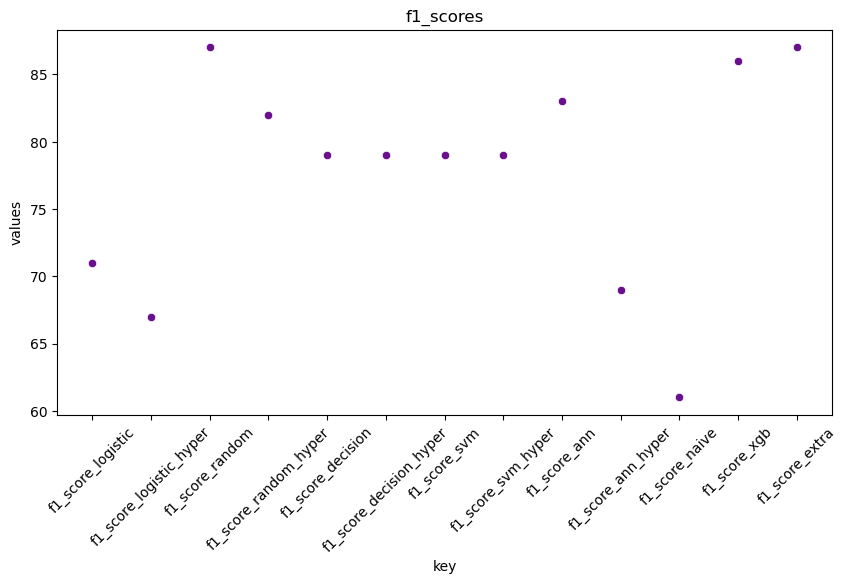

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=score_key,y=score_value,color='#6A0F8E')
plt.xlabel('key')
plt.ylabel('values')
plt.title('f1_scores')
plt.xticks(rotation=45)

## accuracy scores visualize :

In [12]:
accuracy_scores={'test_accuracy_logistic':71,'test__accuracy_score_decision':79,'test_accuracy_random':87,\
                'test_accuracy_score_ann':82,'test_accuracy_score_extra':87,'test_accuracy_score_naive':61,\
                'test_accuracy_score_svm':79,'test_accuracy_score_xgb':86}
accuracy_key=accuracy_scores.keys()
accuracy_value=accuracy_scores.values()

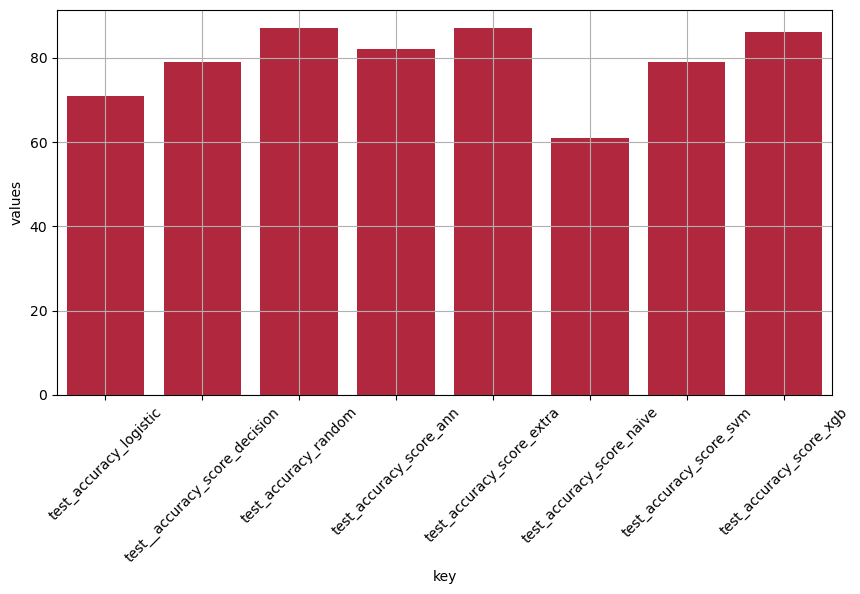

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=accuracy_key,y=accuracy_value,color='#C8102E')
plt.xlabel('key')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.grid()

## Conclusion :

* The f1_score highest score of random forest model 87 % and xgboost model 86 %.
